In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [151]:
app = Flask(__name__)

In [152]:
data = pd.read_csv('btcSentimet.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'btcSentimet.csv'

In [ ]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5259938837920489
Confusion Matrix:
[[ 70  89]
 [ 66 102]]


In [ ]:
import pandas as pd

# Read the CSV file
data_from_btc = pd.read_csv("btc.csv")

# Get the last row
last_row_btc = data_from_btc.iloc[-1]

print("Last row from btc.csv:")
print(last_row_btc)

Last row from btc.csv:
Date            2024-06-18 00:00:00+00:00
Open                         66490.976562
High                         66491.226562
Low                          64118.074219
Close                         64519.03125
Volume                        38465036288
Dividends                             0.0
Stock Splits                          0.0
Name: 3562, dtype: object


In [ ]:
import pandas as pd

# Read the CSV file
sentiment_from_btc = pd.read_csv("bitcoin_sentiment.csv")

# Get the last row
last_row_btc_sentiment = sentiment_from_btc.iloc[-1]

print("Last row from bitcoin_sentiment.csv:")
print(last_row_btc_sentiment)

Last row from bitcoin_sentiment.csv:
Unnamed: 0       2024-06-17
edit_count              2.7
sentiment         -0.417396
neg_sentiment      0.703439
Name: 2672, dtype: object


In [ ]:
# Function to fetch the latest data
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_btc['Open'],
        "high": last_row_btc['High'],
        "low": last_row_btc['Low'],
        "close": last_row_btc['Close'],
        "volume": last_row_btc['Volume'],
        "edit_count": last_row_btc_sentiment['edit_count'],
        "sentiment": last_row_btc_sentiment['sentiment'],
        "neg_sentiment": last_row_btc_sentiment['neg_sentiment']
    }
    return latest_data


In [ ]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,66490.976562,66491.226562,64118.074219,64519.03125,38465036288,2.7,-0.417396,0.703439


In [ ]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Bitcoin Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

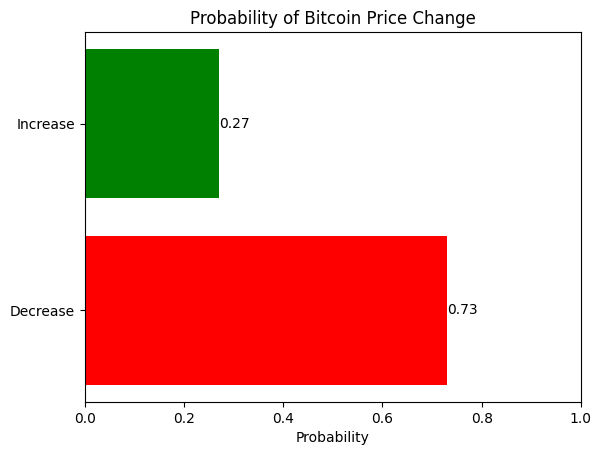

In [ ]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [ ]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.5f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.5f}")

Probability of price decrease: 0.73000
Probability of price increase: 0.27000
